## Part 1: Data Cleaning and Visulization

In [469]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import pylab

In [470]:
df = pd.read_csv('analysisData.csv', low_memory = False)

In [471]:
df.shape

(29142, 96)

In [472]:
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,20091785,https://www.airbnb.com/rooms/20091785,20180303203649,2018-03-05,"Cozy Stay in Queens, Easy Access to Manhattan","A perfect spot for an intern, student or out o...",NaN,"A perfect spot for an intern, student or out o...",none,We're right next to the best Indian food in Qu...,...,f,NaN,NaN,t,f,flexible,f,f,1,0.42
1,3710661,https://www.airbnb.com/rooms/3710661,20180303203649,2018-03-04,Spacious room in comfortable apt.,"Nice size apt 15 minutes from central park, a...",This is a private room in a two bedroom apartm...,"Nice size apt 15 minutes from central park, a...",none,The apartment is conveniently located on the b...,...,f,NaN,NaN,t,f,moderate,f,f,3,2.33
2,15055244,https://www.airbnb.com/rooms/15055244,20180303203649,2018-03-04,Fresh Clean & Modern: Williamsburg at its Best,**This listing would normally be $160 per nigh...,Construction on this mid-sized building was co...,**This listing would normally be $160 per nigh...,none,Williamsburg is bursting with culture. Come se...,...,f,NaN,NaN,f,f,moderate,f,f,1,1.10


In [473]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [474]:
df.shape

(29142, 96)

Preselect 54 columns.
`id` and `host_id` are kept for reference reasons.

In [530]:
preselect = df.drop(labels = ['listing_url', 'scrape_id', 'last_scraped','thumbnail_url', 'medium_url', 
                  'picture_url', 'xl_picture_url', 'access','name', 'space','description','experiences_offered',
                              'notes','transit','neighbourhood_cleansed', 'latitude', 'longitude',
                  'access','host_url', 'host_name', 'host_neighbourhood', 'host_location','host_since',
                  'host_listings_count','host_total_listings_count','host_thumbnail_url','host_picture_url',
                  'neighbourhood','neighbourhood_group_cleansed','street', 'country','country_code',
                  'market','has_availability', 'host_about', 'host_id',
                  'smart_location','is_location_exact', 'calendar_updated','calendar_last_scraped',
                  'availability_60','availability_365','availability_90','maximum_nights',
                  'weekly_price','monthly_price','guests_included','extra_people',
                  'requires_license', 'first_review','last_review', 'review_scores_value',
                  'license','requires_license','calculated_host_listings_count','is_business_travel_ready',
                  'jurisdiction_names','review_scores_value'], axis = 1)



preselect.head(2)

,id,summary,neighborhood_overview,interaction,house_rules,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,20091785,"A perfect spot for an intern, student or out o...",We're right next to the best Indian food in Qu...,I am available via text or email. I'm happy to...,NaN,NaN,NaN,NaN,f,"['email', 'phone', 'facebook', 'google', 'revi...",...,9,8,10,10,10,t,flexible,f,f,0.42
1,3710661,"Nice size apt 15 minutes from central park, a...",The apartment is conveniently located on the b...,I can assist with any question you may have re...,I am asking you to follow these few basic rule...,within an hour,100%,NaN,t,"['email', 'phone', 'reviews', 'kba']",...,10,9,10,10,8,t,moderate,f,f,2.33


- Continue to drop columns with all NaN values: `host_acceptance_rate` and `square_feet`
- Continue to drop columns with many inconsistent values: `city` and `state`

In [531]:
# drop columns 
preselect.drop(labels = ['host_acceptance_rate','square_feet','city','state'], axis = 1, inplace = True)
print(preselect.shape)

(29142, 37)


In [532]:
preselect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29142 entries, 0 to 29141
Data columns (total 37 columns):
id                                  29142 non-null int64
summary                             28271 non-null object
neighborhood_overview               19102 non-null object
interaction                         18344 non-null object
house_rules                         19227 non-null object
host_response_time                  21142 non-null object
host_response_rate                  21142 non-null object
host_is_superhost                   29142 non-null object
host_verifications                  29142 non-null object
host_has_profile_pic                29142 non-null object
host_identity_verified              29142 non-null object
zipcode                             28791 non-null object
property_type                       29142 non-null object
room_type                           29142 non-null object
accommodates                        29142 non-null int64
bathrooms              

**Accommodates, Bedrooms, Beds, Price, Zipcode**

In [533]:
original = len(preselect)

# drop any inconsistent values for other numeric variables
print ('Number of Accommodates 0:', len(preselect[preselect['accommodates'] == 0]))
print ('Number of Bedrooms 0:', len(preselect[preselect['bedrooms'] == 0]))
print ('Number of Beds 0:', len(preselect[preselect['beds'] == 0]))
print ('Number of Listings with Price $0.00:', len(preselect[preselect['price'] == 0.00]))
preselect = preselect[preselect.accommodates != 0]
preselect = preselect[preselect.bedrooms != 0]
preselect = preselect[preselect.beds!= 0]
preselect = preselect[preselect.price != 0.00]

# drop rows with NaN values from zipcode, beds
preselect = preselect.dropna(how='any', subset=['zipcode', 'beds']).reset_index(drop=True)


# clean zipcode, drop inconsistent values
original = len(preselect)
length = []
for value in preselect.zipcode.values:
    length.append(len(value))
    
from collections import Counter 
print ( 'Zipcode Length common value and ferquency: ', Counter(length))

preselect = preselect[preselect.zipcode.astype(str).apply(len) == 5]
preselect = preselect.reset_index(drop = True)

print  ('Number of NaN values removed:', original - len(preselect))

Number of Accommodates 0: 0
Number of Bedrooms 0: 2756
Number of Beds 0: 0
Number of Listings with Price $0.00: 25
Zipcode Length common value and ferquency:  Counter({5: 26032, 10: 2, 12: 1, 2: 1})
Number of NaN values removed: 4


**security_deposit, cleaning_fee** and **host_response_time**

In [534]:
#fill in NaN for security_deposit, cleaning_fee and host_response_time
preselect.fillna({'security_deposit':0 , 
                  'cleaning_fee': 0, 'host_response_time':preselect.host_response_time.mode()[0],
                 'summary':"none",
                 'neighborhood_overview':"none",
                 'interaction': 'none',
                 'house_rules': 'none'},
                 inplace=True)     

#### Change  data format

**host_response_rate** and **zipcode**

In [535]:
#convert response rate 
preselect.host_response_rate = preselect.host_response_rate.fillna('0%').str.replace('%','').astype(int)
preselect.host_response_rate = preselect.host_response_rate/100

#convert zipcode 
preselect.zipcode = preselect.zipcode.astype(object)

#### property_type

In [536]:
# convert property_type to fewer nlevels
print ("Property_type has {} unique values".format(preselect['property_type'].nunique()))

preselect.property_type = preselect.property_type.str.lower()

preselect.property_type = preselect.property_type.str.replace("aparthotel|bed and breakfast|boutique hotel|hostel|hotel|resort|timeshare", "hotel")
preselect.property_type = preselect.property_type.str.replace("apartment|vacation home|bungalow|cabin|casa particular \(cuba\)|chalet|condominium|other|castle|villa|guest suite|guesthouse|earth house|house|town house |loft|serviced apartment|townhouse","house")
preselect.property_type = preselect.property_type.str.replace("boat|camper/rv|cave|island|tent|train|treehouse|yurt","outdoor")
preselect.property_type = preselect.property_type.str.replace("in-law|dorm|tiny house","small_house")

print ("After formating, Property_type now has {} unique values".format(preselect['property_type'].nunique()))

Property_type has 33 unique values
After formating, Property_type now has 4 unique values


#### cancellation_policy

In [537]:
# convert cancel policy
print ("Cancellation_policy has {} unique values".format(preselect['cancellation_policy'].nunique()))

preselect.cancellation_policy = preselect.cancellation_policy.str.replace("super_strict_30|super_strict_60", "strict")

print ("After formating, Cancellation_policy now has {} unique values".format(preselect['cancellation_policy'].nunique()))

Cancellation_policy has 5 unique values
After formating, Cancellation_policy now has 3 unique values


In [538]:
almost_clean = preselect.copy()
almost_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26032 entries, 0 to 26031
Data columns (total 37 columns):
id                                  26032 non-null int64
summary                             26032 non-null object
neighborhood_overview               26032 non-null object
interaction                         26032 non-null object
house_rules                         26032 non-null object
host_response_time                  26032 non-null object
host_response_rate                  26032 non-null float64
host_is_superhost                   26032 non-null object
host_verifications                  26032 non-null object
host_has_profile_pic                26032 non-null object
host_identity_verified              26032 non-null object
zipcode                             26032 non-null object
property_type                       26032 non-null object
room_type                           26032 non-null object
accommodates                        26032 non-null int64
bathrooms             

###  Visulization by Zipcode 

In [485]:
import folium
import pandas as pd
import json
from folium import plugins

In [539]:
geo_df = almost_clean[['id','zipcode','price']]

In [547]:
#group the listings dataframe by zip code and count the number of listings in each zip code
priceListings = geo_df.groupby('zipcode')['price'].mean()
#initialize an empty dataframe to store this new data
priceByListing = pd.DataFrame()
#populate the new dataframe with a 'zipcode' column and a 'numStores' column
priceByListing['zipcode'] = [str(i) for i in priceListings.index]
priceByListing['price'] = priceListings.values

#initialize the NY map
NYMap = folium.Map(location=[40.7128, -74.0060],zoom_start=10)

#create New York choropleth map
NYMap.choropleth(geo_data='nyc_zip_code_tabulation_areas_polygons.geojson', data=numListingsByZip, columns=['zipcode', 'price'], \
                 key_on='feature.properties.postalcode', fill_color='BuPu', fill_opacity=0.9, line_opacity=0.4,
             legend_name='Listings Num')

NYMap.save('NYChoropleth.html')
NYMap

The interactive map shows detailed average prices for each zip code. And we can tell that Airbnb listings in Mhattan have the highest listing prices among all boroughs. Also we notice that the majority of the data is concentrated in the Manhattan area, with less data in other areas. 

### Transform Textual Columns

**host_verifications**

In [438]:
# make a list of words extracted from host_verifications
# using list comprehension to improve speed
hver_list = almost_clean.host_verifications.str.replace("[","").str.replace("]","").str.split(',')
hver_word = [ele.replace("'","").strip() for ele_list in hver_list for ele in ele_list]
hver_word_freq = list(Counter(hver_word))
hver_word_freq

['email',
 'phone',
 'facebook',
 'google',
 'reviews',
 'kba',
 'jumio',
 'work_email',
 'offline_government_id',
 'selfie',
 'government_id',
 'identity_manual',
 'linkedin',
 'manual_offline',
 'amex',
 'manual_online',
 'sent_id',
 'weibo',
 'sesame',
 'sesame_offline',
 'zhima_selfie',
 'photographer']

In [439]:
#clean host_verifications column
#create a dataframe to contain seperated features in host_verifications
def create_hver_df():
    hver_df = pd.DataFrame(index = range(len(almost_clean)), columns = ['hver_{}'.format(value) for value in hver_word_freq])

    for word in hver_word_freq:
        hver_df['hver_{}'.format(word)] = almost_clean.host_verifications.str.contains(word).astype(int)

    return hver_df

hver_df = create_hver_df()
#concat new dataframe to preselect
#drop the orginal host_verifications clumn and concat new columns
almost_clean.drop(['host_verifications'], axis = 1, inplace = True)
almost_clean = pd.concat([almost_clean, hver_df], axis = 1)

**amenities**

In [440]:
def extract_amenities_word():
    '''
    input: nested list
    output: word frequency table
    '''
    almost_clean.amenities.fillna("none", inplace = True)
    
    am_list = almost_clean.amenities.str.replace('"','').str.replace("{","").str.replace("}","").str.split(',')
    am_word = [ele.strip() for ele_list in am_list for ele in ele_list]
    am_word_freq = list(Counter(am_word))

    #remove unwanted values
    unwanted_words = {'', 'translation missing: en.hosting_amenity_49','translation missing: en.hosting_amenity_50',} 
    word = [element for element in am_word_freq if element not in unwanted_words]
    #return pd.DataFrame(word_freq, columns = ['word','freq'])
    return word

am_word_freq = extract_amenities_word()


In [441]:
#clean amenities column
#create a dataframe to contain seperated features in amenities
def create_am_df():
    am_df = pd.DataFrame(index = range(len(almost_clean)), columns = ['am_{}'.format(value) for value in am_word_freq])

    for word in am_word_freq:
        am_df['am_{}'.format(word)] = almost_clean.amenities.astype(str).str.contains(word).astype(int)

    return am_df

am_df = create_am_df()

#drop orginal clumn and concat new columns
almost_clean.drop(['amenities'], axis = 1, inplace = True)
almost_clean = pd.concat([almost_clean, am_df], axis = 1)

/Users/li/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
/Users/li/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
/Users/li/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys


In [442]:
almost_clean.shape

(28745, 174)

**summary**

In [443]:
almost_clean.summary = almost_clean.summary.str.lower()
almost_clean['sum_student'] = almost_clean.summary.str.contains("student").astype(int)
almost_clean['sum_location'] = almost_clean.summary.str.contains("near|location|located|block|blocks|block|minute|min|subway|train").astype(int)
almost_clean['sum_view'] = almost_clean.summary.str.contains("views|view").astype(int)
almost_clean['sum_renovated'] = almost_clean.summary.str.contains("renovated").astype(int)
almost_clean.drop(['summary'], axis = 1, inplace = True)

In [444]:
almost_clean.shape

(28745, 177)

**interaction**

In [445]:
almost_clean.interaction = almost_clean.interaction.str.lower()
almost_clean['int_phone'] = almost_clean.interaction.str.contains("text|texts|phone|call").astype(int)
almost_clean['int_email'] = almost_clean.interaction.str.contains("email").astype(int)
almost_clean.drop(['interaction'], axis = 1, inplace = True)

In [446]:
almost_clean.shape

(28745, 178)

**neighborhoood_overview**

In [447]:
almost_clean.neighborhood_overview = almost_clean.neighborhood_overview.str.lower()
almost_clean['neigh_location'] = almost_clean.neighborhood_overview.str.contains("near|close|nearby|access|location|located|block|blocks|block|minute|min|proximity").astype(int)
almost_clean['neigh_train'] = almost_clean.neighborhood_overview.str.contains("train|trains|subway|commute|citi|bus|buses|stop|stops").astype(int)
almost_clean['neigh_shop'] = almost_clean.neighborhood_overview.str.contains("shop|shops|shopping|commercial|store|stores").astype(int)
almost_clean['neigh_bar_rest'] = almost_clean.neighborhood_overview.str.contains("bars|bar|restaurant|restaurants").astype(int)
almost_clean['neigh_quiet'] = almost_clean.neighborhood_overview.str.contains("peaceful|quiet").astype(int)
almost_clean['neigh_cool'] = almost_clean.neighborhood_overview.str.contains("lively|vibrant|hip|trendy|cool").astype(int)
almost_clean.drop(['neighborhood_overview'], axis = 1, inplace = True)

In [448]:
almost_clean.shape

(28745, 183)

**house_rules**

In [449]:
almost_clean.house_rules = almost_clean.house_rules.str.lower()
almost_clean['hr_smoking'] = almost_clean.house_rules.str.contains("smoking|no smoking|no smoke").astype(int)
almost_clean['hr_party'] = almost_clean.house_rules.str.contains("no party|parties|party|gathering|gatherings|partying|no friends|no music|no guests|no guest").astype(int)
almost_clean['har_pets'] = almost_clean.house_rules.str.contains("pet|pets|no pets|no pet").astype(int)
almost_clean.drop(['house_rules'], axis = 1, inplace = True)

In [450]:
almost_clean.shape

(28745, 185)

In [451]:
almost_clean.zipcode.describe()

count     28745
unique      184
top       11211
freq       1434
Name: zipcode, dtype: object

In [452]:
print(np.sort(almost_clean.columns))

['accommodates' 'am_24-hour check-in' 'am_Accessible-height bed'
 'am_Accessible-height toilet' 'am_Air conditioning' 'am_Air purifier'
 'am_BBQ grill' 'am_Baby bath' 'am_Baby monitor'
 'am_Babysitter recommendations' 'am_Bathtub'
 'am_Bathtub with shower chair' 'am_Beach essentials' 'am_Beachfront'
 'am_Bed linens' 'am_Breakfast' 'am_Buzzer/wireless intercom'
 'am_Cable TV' 'am_Carbon monoxide detector' 'am_Cat(s)'
 'am_Changing table' 'am_Children’s books and toys'
 'am_Children’s dinnerware' 'am_Cleaning before checkout'
 'am_Coffee maker' 'am_Cooking basics' 'am_Crib'
 'am_Disabled parking spot' 'am_Dishes and silverware' 'am_Dishwasher'
 'am_Dog(s)' 'am_Doorman' 'am_Dryer' 'am_EV charger' 'am_Elevator'
 'am_Essentials' 'am_Ethernet connection' 'am_Extra pillows and blankets'
 'am_Family/kid friendly' 'am_Fire extinguisher' 'am_Fireplace guards'
 'am_Firm mattress' 'am_First aid kit' 'am_Fixed grab bars for shower'
 'am_Flat path to front door' 'am_Free parking on premises'
 'am_Fr

### Onhe-hot encoding and standarlization

We have a few columns that contain categorical predictors. The regressors in scikit learn require numeric fields; thus we will use the get_dummies function in Pandas to convert these into 'dummy' variables (one hot encoding). We will standardize the non-categorical predictors and convert them to floating point values since we will later try linear regression models such as Ridge and Lasso regression.

In [453]:
# convert categorical variables to dummy variables and int dtype
to_dummy = ['host_response_time','host_is_superhost','host_has_profile_pic','cancellation_policy',
 'host_identity_verified','zipcode','property_type','room_type','bed_type','instant_bookable',
 'require_guest_profile_picture','require_guest_phone_verification','cancellation_policy']


dummy_df = pd.get_dummies(almost_clean[to_dummy])
clean = pd.concat([almost_clean, dummy_df.astype(int)],axis = 1).drop(labels=to_dummy, axis = 1)

In [454]:
print(np.sort(clean.columns))
clean.shape

['accommodates' 'am_24-hour check-in' 'am_Accessible-height bed'
 'am_Accessible-height toilet' 'am_Air conditioning' 'am_Air purifier'
 'am_BBQ grill' 'am_Baby bath' 'am_Baby monitor'
 'am_Babysitter recommendations' 'am_Bathtub'
 'am_Bathtub with shower chair' 'am_Beach essentials' 'am_Beachfront'
 'am_Bed linens' 'am_Breakfast' 'am_Buzzer/wireless intercom'
 'am_Cable TV' 'am_Carbon monoxide detector' 'am_Cat(s)'
 'am_Changing table' 'am_Children’s books and toys'
 'am_Children’s dinnerware' 'am_Cleaning before checkout'
 'am_Coffee maker' 'am_Cooking basics' 'am_Crib'
 'am_Disabled parking spot' 'am_Dishes and silverware' 'am_Dishwasher'
 'am_Dog(s)' 'am_Doorman' 'am_Dryer' 'am_EV charger' 'am_Elevator'
 'am_Essentials' 'am_Ethernet connection' 'am_Extra pillows and blankets'
 'am_Family/kid friendly' 'am_Fire extinguisher' 'am_Fireplace guards'
 'am_Firm mattress' 'am_First aid kit' 'am_Fixed grab bars for shower'
 'am_Flat path to front door' 'am_Free parking on premises'
 'am_Fr

(28745, 391)

In [455]:
# convert non-categorical variables to floats and standardize
def standardize_col(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)

non_cat_vars = ['accommodates','bathrooms','bedrooms','beds','security_deposit','cleaning_fee',
                'minimum_nights','availability_30','number_of_reviews','review_scores_rating',
                'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                'review_scores_communication','review_scores_location','reviews_per_month']

for col in non_cat_vars:
    clean[col] = clean[col].astype(float)
    clean[col] = standardize_col(clean[col])

clean.head()

,id,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,minimum_nights,...,bed_type_Real Bed,instant_bookable_f,instant_bookable_t,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,20091785,0.0,-1.023974,-0.316049,-0.220717,-0.547809,45,-0.666093,-1.005529,-0.282376,...,1,0,1,1,0,1,0,1,0,0
1,3710661,1.0,-0.483551,-0.316049,-0.220717,-0.547809,95,-0.666093,0.069812,-0.184868,...,1,0,1,1,0,1,0,0,1,0
2,15055244,1.0,-0.483551,0.923863,-0.220717,-0.547809,60,-0.666093,-0.360324,0.205167,...,1,1,0,1,0,1,0,0,1,0
3,19640913,1.0,-0.483551,-0.316049,-0.220717,-0.547809,70,-0.666093,-0.575393,-0.184868,...,1,0,1,1,0,1,0,1,0,0
4,11888948,0.6,-0.483551,-0.316049,-0.220717,-0.547809,104,-0.666093,0.284881,0.790218,...,1,1,0,1,0,1,0,0,1,0


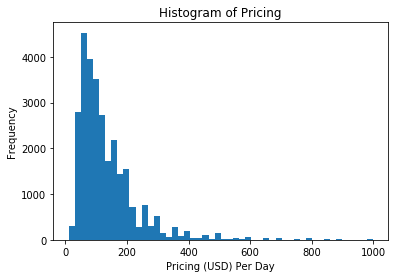

In [457]:
# visualize distribution of price (target variable)
plt.hist(clean['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()


We see the distribution for pricing is strongly skewed right. This again makes sense as a majority of the listings on Airbnb are single individual listings. Additionally, Airbnb does strongly cater to travelers who are looking for cheaper places to stay for short durations of time. To compensate for the skewed right distribution, we will log the response variable and store the results in a new panda column. We will then run our baseline models on both the logged and original response and compare the results.

In [460]:
# log transform the response 'price'
clean['price_log'] = clean['price'].apply(lambda x: math.log(x))

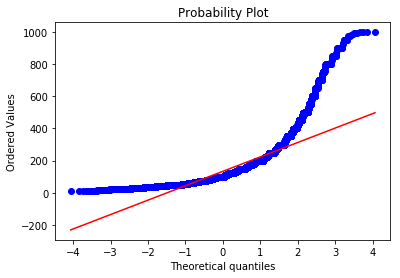

In [467]:
# qq plot for non-log-transformed pricing
stats.probplot(clean['price'], dist="norm", plot = pylab)
pylab.show()

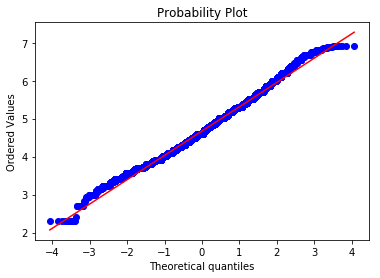

In [468]:
# qq plot for log-transformed pricing
stats.probplot(clean['price_log'], dist="norm", plot = pylab)
pylab.show()

We see that after transformation, the distribution for price resembles that of a normal distribution. We see from the Q-Q plots that log-transforming the response variable yields a distribution that more closely resembles that of a normal distribution. This normality validation is important in order to fit the assumptions of linear regression models.

In [461]:
clean.to_csv('clean_df.csv', index=False)